In [6]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('insurance.csv')

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df.isnull().sum()   

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<Axes: xlabel='age', ylabel='charges'>

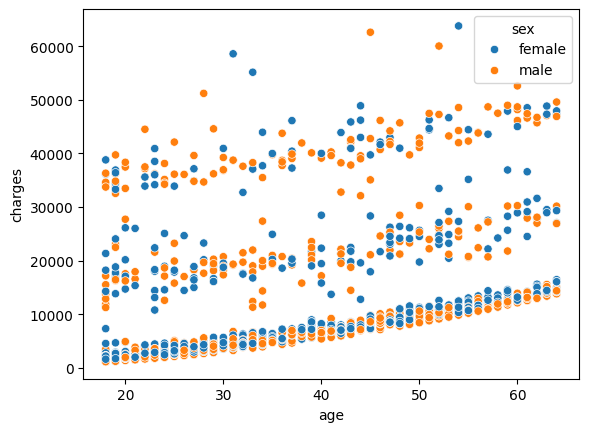

In [14]:
sns.scatterplot(x='age',y='charges',data=df,hue='sex')

<Axes: xlabel='sex'>

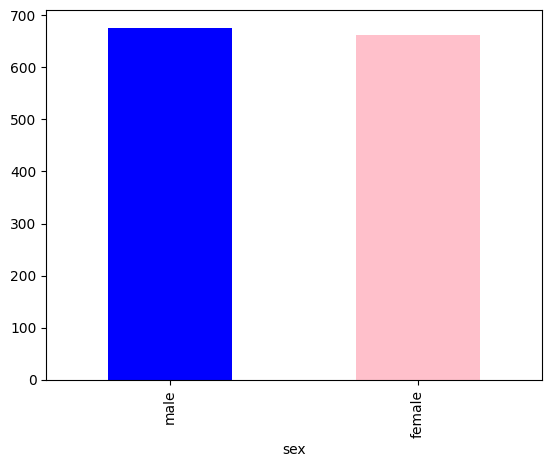

In [15]:
df['sex'].value_counts().plot(kind='bar',color=['blue','pink']) 

<Axes: xlabel='smoker'>

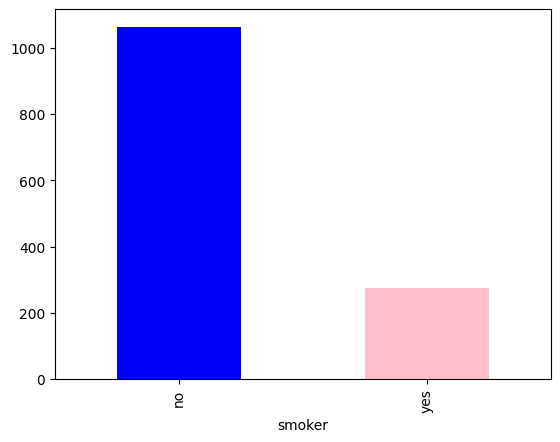

In [16]:
df['smoker'].value_counts().plot(kind='bar',color=['blue','pink'])


In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [19]:
df['smoker']=le.fit_transform(df['smoker'])

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [21]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
df['region']=ohe.fit_transform(df[['region']]).toarray()
df.head()



,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0.0,16884.92400
1,18,1,33.770,1,0,0.0,1725.55230
2,28,1,33.000,3,0,0.0,4449.46200
3,33,1,22.705,0,0,0.0,21984.47061
4,32,1,28.880,0,0,0.0,3866.85520


In [22]:
df['region'].value_counts()

region
0.0    1014
1.0     324
Name: count, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split    
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [25]:
fetures=['age','sex','bmi','children','smoker','region']
X=df[fetures]
y=df['charges']


In [26]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [28]:
lr=LinearRegression()

In [29]:
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
x_train[0:5]

,age,sex,bmi,children,smoker,region
560,46,0,19.95,2,0,0.0
1285,47,0,24.32,0,0,1.0
1142,52,0,24.86,0,0,0.0
969,39,0,34.32,5,0,0.0
486,54,0,21.47,3,0,0.0


np.float64(1725.5523)

In [31]:
y_prd=lr.predict(x_test)

In [32]:
y_prd

array([ 8981.62564012,  6819.62121547, 36617.68164808,  9235.83016932,
       26719.54652871, 11026.01173886,   -58.57068975, 16641.02170687,
        1119.44601156, 10991.13655755, 28320.25181084,  9140.81844871,
        5304.84929098, 38431.47946048, 40267.32966352, 37120.63125507,
       15248.99119443, 35931.95899492,  9160.71998248, 31218.88981282,
        4077.55842881, 10326.61603607,  2564.44068797,  7100.15817438,
       11069.4647539 , 12946.12146478, 14687.11421965,  5918.34774774,
        9971.94971615,  2220.47824633,  9321.40668756, 12821.54072246,
        4583.93369208,  3197.81194052,  4658.88760295, 13001.41641974,
        2182.25130048,  9007.62810169, 33040.60119212, 32614.49203484,
        4117.22166253,  4081.63901946, 14321.17958412, 11197.18850067,
        8808.3124576 , 12307.34645802,  5026.61015326,  3365.9062948 ,
       35528.39271082,  9176.27867829, 15859.34150142,  2391.69506375,
       12085.69665614,  1489.03975109, 13423.19303135, 12572.62802858,
      

In [33]:
r2_score(y_test,y_prd)

0.7826768397723665

In [34]:
mean_squared_error(y_test,y_prd)

33739144.94912355

In [35]:
mean_absolute_error(y_test,y_prd)

4187.986365109797


Normal Regression is clearly overfitting the data, let's try other models
Using Lasso (L1 Regularized) Regression Model

In [36]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=1000)




In [37]:
r.fit(x_train,y_train)


Ridge(alpha=1000)

In [38]:
print(r.coef_)

[ 226.72344288  241.29592865  323.93766612  331.24217544 3507.83063591
  129.80503416]


In [39]:
print(r.intercept_)

-6720.780042076496


In [40]:
y_pred1=r.predict(x_test)

In [41]:
r2_score(y_test,y_pred1)

0.32253149113017365

In [42]:
mean_absolute_error(y_test,y_pred1)

8123.732109244852